# Crop Classification and Residual Analysis

In [39]:
import pandas as pd
import scipy as sc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.cross_validation import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
Crops = pd.read_csv('Data/Agosto.csv').iloc[:,1:]

In [6]:
Crops['crop_list']
Active = Crops[Crops['is_active'] == 1]

In [7]:
lottacrop = Active[Active.crop_list.str.contains('OAT')|Active.crop_list.str.contains('SUNFLOWER')  | Active.crop_list.str.contains('ALMOND') | Active.crop_list.str.contains('GRAPE') | Active.crop_list.str.contains('WALNUT') |Active.crop_list.str.contains('RICE') | Active.crop_list.str.contains('ALFALFA')| Active.crop_list.str.contains('ALFALFA') | Active.crop_list.str.contains('CORN')| Active.crop_list.str.contains('WHEAT')| Active.crop_list.str.contains('TOMATO')  | Active.crop_list.str.contains('SAFFLOWER')]

In [8]:
nonorg = lottacrop.drop(lottacrop.crop_list[lottacrop.crop_list.str.contains('ORG')].index)

In [9]:
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALMOND')] = 'ALMOND'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('GRAPE')] = 'GRAPE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('OAT')] = 'OAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('RICE')] = 'RICE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WALNUT')] = 'WALNUT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('CORN')] = 'CORN'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WHEAT')] = 'WHEAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('TOMATO')] = 'TOMATO'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [10]:
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes

In [11]:
crops_list = {"WALNUT":9,"ALFALFA":0,"OAT":4,"GRAPE":3,"ALMOND":1,"WHEAT":10,"RICE":5,"CORN":2,"SAFFLOWER":6, "SUNFLOWER":7, "TOMATO":8}

In [12]:
firstx = lottacrop.iloc[:,1:61].dropna()
secondx = lottacrop.iloc[:,85:-1].dropna()

# Model Selection Process with only July Crops
### All Crops

In [43]:
fullx = firstx.dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [44]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [45]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.601
0.84725
0.86325
0.862


In [46]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.65010567, 6.45059793, 5.35582464, 6.03410504, 5.44127589,
       5.84029633, 5.42876988, 6.50389938, 6.74179451, 5.90491461,
       6.4574724 ])

In [47]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[540,   8,   0,   8,   6,   0,   1,   2,   6,   2,   6],
       [ 15, 380,   2,   9,   8,   0,   3,   7,   2,  13,  11],
       [  4,   7, 112,   0,   2,   0,   2,   1,   4,   2,   6],
       [ 13,  17,   0, 225,   1,   0,   2,   1,   8,   6,   9],
       [  4,  10,   0,   0, 115,   2,   2,   0,   0,   0,  11],
       [  2,   1,   2,   0,   1, 290,   3,   3,   4,   1,   1],
       [  7,   6,   5,   3,   1,   0, 117,   5,   4,   0,  11],
       [ 11,  11,   5,   5,   2,   6,   5, 436,  31,   0,   1],
       [ 12,   1,  13,   1,   0,   4,   3,  30, 595,   2,   6],
       [ 20,  20,   0,  11,   3,   2,   0,   2,   2, 171,   1],
       [ 15,  12,   0,   3,   6,   0,   3,   4,  11,   0, 472]],
      dtype=int64)

In [48]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[541,  10,   0,   6,   6,   0,   3,   1,   4,   1,   7],
       [ 13, 394,   0,   5,   8,   0,   0,   6,   1,  10,  13],
       [  3,   4, 115,   1,   5,   0,   1,   0,   4,   2,   5],
       [ 13,   7,   0, 226,   4,   1,   1,   6,  10,   5,   9],
       [  5,  14,   3,   1, 104,   2,   2,   0,   0,   1,  12],
       [  0,   3,   7,   2,   1, 287,   2,   4,   1,   0,   1],
       [  6,   3,   5,   4,   2,   0, 118,   4,   5,   0,  12],
       [  7,   8,   5,   7,   0,   6,   5, 427,  43,   0,   5],
       [ 17,   1,  13,   1,   0,   3,   5,  27, 594,   0,   6],
       [ 17,  26,   0,   9,   4,   1,   1,   0,   1, 169,   4],
       [ 13,   5,   2,   4,   8,   1,   2,   8,  10,   0, 473]],
      dtype=int64)

### Non-Organic

In [49]:
firstx = nonorg.iloc[:,1:61].dropna()
fullx = firstx.dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [50]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [51]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.58325
0.8445
0.8695
0.87025


In [52]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.72205958, 6.34955381, 5.40239927, 5.93999507, 5.34140795,
       5.8678961 , 5.45296545, 6.57341862, 6.74347005, 5.81073891,
       6.45348518])

In [53]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[592,   8,   1,   3,   2,   0,   3,   3,   7,   0,   7],
       [ 21, 357,   2,   9,   3,   1,   0,   3,   1,   8,  11],
       [  3,   0, 108,   5,   3,   1,   3,   1,   9,   4,   4],
       [ 14,  21,   0, 198,   0,   0,   0,   2,   5,   0,   4],
       [  4,   7,   3,   2, 105,   4,   2,   0,   3,   1,  26],
       [  2,   1,   1,   2,   0, 290,   0,   2,   0,   2,   0],
       [  4,   0,   3,   2,   3,   0, 127,   5,   3,   0,  10],
       [  6,   8,  13,   3,   1,   3,   4, 447,  15,   0,   6],
       [ 19,   2,   2,   1,   0,   3,   0,  33, 615,   1,   2],
       [ 17,  32,   3,   7,   0,  10,   0,   0,   3, 166,   3],
       [  9,   7,   3,   5,   5,   0,   7,   7,  18,   0, 473]],
      dtype=int64)

In [54]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[581,   5,   0,   6,   5,   0,   4,   4,   9,   1,  11],
       [ 15, 359,   4,  12,   1,   0,   0,   6,   3,   4,  12],
       [  2,   1, 106,   4,   2,   1,   3,   2,  10,   2,   8],
       [ 23,  24,   0, 185,   0,   0,   0,   2,   5,   1,   4],
       [  6,  11,   0,   0, 111,   4,   2,   1,   0,   0,  22],
       [  0,   0,   2,   1,   1, 287,   0,   2,   2,   5,   0],
       [  3,   1,   3,   3,   1,   0, 124,   6,   6,   0,  10],
       [  7,   9,  13,   3,   2,   3,   3, 448,  14,   0,   4],
       [ 11,   3,   2,   1,   0,   3,   1,  29, 625,   0,   3],
       [ 16,  27,   0,  12,   0,   8,   0,   1,   3, 172,   2],
       [  7,   5,   2,   5,   3,   0,   6,   7,  16,   0, 483]],
      dtype=int64)

# Model Selection Process with all Crops (July and August)

In [13]:
fullx = firstx.join(secondx).dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [40]:
n_neighbors = 9

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

# Cross Validation for KNN

In [29]:
myList = list(range(1,50))

# subsetting just the odd ones
neighbors2 = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []


# perform 10-fold cross validation
for k in neighbors2:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',algorithm='ball_tree')
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#print(cv_scores) # print if you want


In [41]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.6423745173745173
0.8689671814671814
0.8832046332046332
0.8788610038610039


In [13]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.640329  , 6.44370788, 5.35004628, 6.01325711, 5.38077575,
       5.88088567, 5.35869779, 6.46908486, 6.79678327, 5.80486959,
       6.48754857])

In [14]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[576,   6,   2,   5,   4,   0,   3,   2,   4,   1,  10],
       [  2, 422,   0,   7,   3,   0,   0,   4,   1,  10,   8],
       [ 10,  10, 123,   1,   1,   1,   3,   4,  11,   1,   7],
       [ 13,  22,   0, 219,   1,   0,   2,   0,   1,   5,   5],
       [  4,   7,   0,   0, 102,   0,   3,   0,   0,   0,  16],
       [  4,   1,   2,   0,   5, 308,   1,   3,   4,   0,   1],
       [  6,   2,   4,   1,   2,   5, 129,   3,   1,   1,   9],
       [  5,   4,   8,   2,   2,   4,   9, 432,  27,   0,   8],
       [  6,   4,   6,   0,   0,   2,   0,  29, 668,   0,   5],
       [ 12,  15,   0,  14,   2,   1,   0,   2,   2, 190,   2],
       [ 14,   4,   2,   1,  13,   0,   3,   3,  18,   0, 491]],
      dtype=int64)

In [15]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[581,   7,   0,   3,   5,   0,   2,   0,   5,   0,  10],
       [  3, 416,   0,  16,   6,   0,   0,   2,   1,   4,   9],
       [  2,   4, 116,   0,   0,   1,   2,  12,  19,   3,  13],
       [ 11,  18,   1, 224,   1,   1,   2,   1,   2,   5,   2],
       [  3,  15,   1,   1,  91,   0,   4,   1,   0,   1,  15],
       [  4,   1,   4,   0,   3, 306,   1,   4,   2,   0,   4],
       [  4,   2,   3,   6,   4,   5, 120,   7,   4,   0,   8],
       [  5,   4,   8,   5,   0,   5,   8, 430,  26,   0,  10],
       [  9,   2,   6,   1,   0,   2,   1,  28, 663,   0,   8],
       [ 14,  18,   0,  13,   2,   1,   0,   2,   1, 188,   1],
       [ 13,   4,   1,   2,  11,   0,   2,   3,  17,   0, 496]],
      dtype=int64)

# Using Non-Organic Data

In [16]:
nonorg.crop_list[nonorg['crop_list'].str.contains('ALMOND')] = 'ALMOND'
nonorg.crop_list[nonorg['crop_list'].str.contains('GRAPE')] = 'GRAPE'
nonorg.crop_list[nonorg['crop_list'].str.contains('OAT')] = 'OAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('RICE')] = 'RICE'
nonorg.crop_list[nonorg['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
nonorg.crop_list[nonorg['crop_list'].str.contains('WALNUT')] = 'WALNUT'
nonorg.crop_list[nonorg['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
nonorg.crop_list[nonorg['crop_list'].str.contains('CORN')] = 'CORN'
nonorg.crop_list[nonorg['crop_list'].str.contains('WHEAT')] = 'WHEAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('TOMATO')] = 'TOMATO'
nonorg.crop_list[nonorg['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [17]:
nonorg['code'] = nonorg.crop_list.astype('category').cat.codes

In [18]:
firstx = nonorg.iloc[:,1:61].dropna()
secondx = nonorg.iloc[:,85:-1].dropna()

In [19]:
fullx = firstx.join(secondx).dropna()
fully = nonorg.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [20]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [21]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.67575
0.865
0.88675
0.87725


In [22]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.59487712, 6.43561598, 5.37683247, 5.92245247, 5.36426261,
       5.82890524, 5.41104458, 6.43955776, 6.7349753 , 5.84979884,
       6.48547797])

In [23]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[570,   6,   0,   5,   0,   0,   2,   1,  11,   0,   7],
       [  4, 379,   3,   2,   9,   0,   0,   1,   1,   3,   3],
       [  3,   9, 137,   1,   1,   0,   7,   5,   1,   1,   7],
       [ 10,  31,   0, 215,   4,   0,   0,   0,   0,   4,   7],
       [  7,   7,   0,   0, 105,   0,   1,   2,   0,   3,  11],
       [  1,   2,   0,   1,   3, 292,   2,   1,   1,   1,   3],
       [  1,   4,   4,   3,   1,   1, 127,   4,   4,   0,   7],
       [  6,  10,   4,   0,   1,   8,   6, 418,  22,   0,   7],
       [  6,   1,  15,   2,   0,   1,   0,  35, 632,   2,   5],
       [  4,  25,   0,  11,   1,   2,   0,   0,   3, 181,   5],
       [  7,   5,   1,   2,   8,   1,   8,   6,   9,   0, 491]],
      dtype=int64)

In [24]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[566,   9,   0,   2,   3,   0,   2,   1,   9,   0,  10],
       [  4, 378,   3,   3,   5,   0,   0,   1,   1,   3,   7],
       [ 10,   7, 120,   1,   8,   1,   6,   6,   5,   1,   7],
       [  7,  34,   2, 212,   0,   0,   0,   1,   1,   5,   9],
       [  7,   9,   0,   0,  99,   0,   0,   4,   0,   2,  15],
       [  0,   1,   0,   0,   2, 294,   3,   2,   1,   0,   4],
       [  3,   0,   4,   4,   1,   1, 118,   7,   8,   0,  10],
       [  3,   3,   6,   0,   1,   5,   3, 417,  40,   0,   4],
       [  6,   2,  11,   0,   2,   1,   1,  29, 642,   0,   5],
       [ 10,  30,   0,   9,   2,   2,   0,   1,   3, 172,   3],
       [  6,   7,   3,   3,   5,   1,   5,   8,   9,   0, 491]],
      dtype=int64)

## Residual Analysis
#### Entropy Analysis for Extra Trees Classifier

In [25]:
misclassified = np.where(Y_test != extra.predict(X_test))
classified = np.where(Y_test == extra.predict(X_test))

In [26]:
def logfcn(x):
    c = x.copy()
    c[np.where(c == 0.0)] = 1 
    return np.log(c)

In [27]:
pk = extra.predict_proba(X_test)
d = pk * logfcn(pk)
entropy = -1*np.sum(d, axis = 1)

In [28]:
import geopandas as gpd

In [29]:
cropfields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")
cropfields1 = cropfields[["OBJECTID", "geometry"]]

In [30]:
test_df = lottacrop.loc[X_test.index]
test_df['entropy'] = entropy
testfields = gpd.GeoDataFrame(test_df.merge(cropfields1, on = 'OBJECTID', how = 'left'))

In [31]:
testfields["geometry"] = testfields["geometry_y"]
testfields = testfields.drop(columns = ["geometry_y"])
testfields.crs = {'init': 'epsg:26910'}
testfields = testfields.to_crs("+proj=longlat +datum=WGS84 +no_defs")

In [32]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

Text(44.3617,0.5,'Longitude')

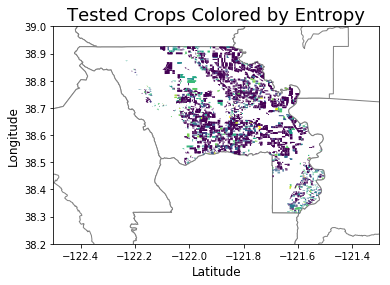

In [33]:
ax = yolo.plot(color = "white", edgecolor = "gray")
testfields.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Tested Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [34]:
misclass_test = testfields.loc[misclassified]

In [35]:
len(nonorg)

10005

Text(44.3617,0.5,'Longitude')

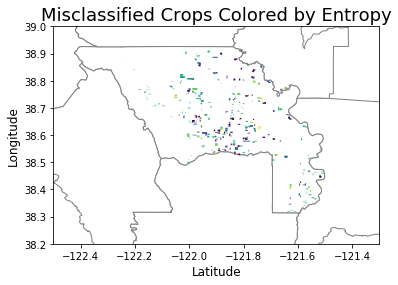

In [36]:
ax = yolo.plot(color = "white", edgecolor = "gray")
misclass_test.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Misclassified Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [37]:
class_test = testfields.loc[classified]

Text(44.3617,0.5,'Longitude')

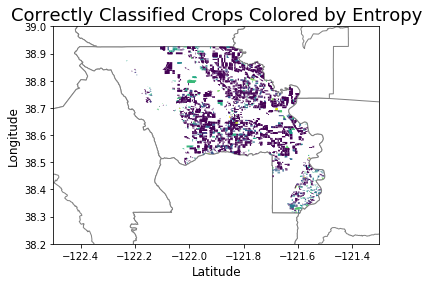

In [38]:
ax = yolo.plot(color = "white", edgecolor = "gray")
class_test.plot(ax =ax, column = 'entropy')
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Correctly Classified Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [39]:
np.mean(misclass_test["entropy"])

0.9357451159724115

In [40]:
np.std(misclass_test["entropy"])

0.5856916467506822

In [41]:
np.mean(class_test["entropy"])

0.16705967242343508

In [42]:
np.std(class_test["entropy"])

0.3770681422973032